In [1]:
import nltools
from nltools.data import Brain_Data, Adjacency
from nltools.mask import expand_mask
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
from sklearn.utils import shuffle

    
import os

% matplotlib inline

print(nltools.__version__)

0.3.5


In [7]:
## Set up Folders

folder_path = "."

## Set up Mask

mask = 'dDMN.nii.gz'
mask_region = "dDMN"
mask_path = os.path.join(folder_path, 'masked_csv', mask_region)

subjects = [ '145', '157', '168', '184', '200', '214',  '219', '220', '222', '223', '229', '245', '253', '257', '263',  '267', '270', '277']
num_subs = len(subjects)

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:

express = pd.read_csv('./data/videoInfo.csv')

express


In [124]:
##Pairwise by Pairwise

## Set up Video and Participants

for video in range(4,6):

    
    ## Behavioral Correlations
    behavioral = pd.read_csv(mask_path + "/video_" + str(video) + '_behavioralcorrelations.csv', index_col='Unnamed: 0')
    behavioral = behavioral.mask(np.tril(np.ones(behavioral.shape)).astype(np.bool))
    behavioral = behavioral.stack().reset_index()[0]
    #behavioral = shuffle(behavioral).reset_index()[0]

    ## Scan Correlations
    fMRI = pd.read_csv(mask_path + "/video_" + str(video) + '_fMRIcorrelations.csv',index_col='Unnamed: 0')
    fMRI = fMRI.mask(np.tril(np.ones(fMRI.shape)).astype(np.bool))
    #fMRI = fMRI.stack().reset_index()[0]

    ## Expressivity
    express = pd.read_csv('./data/videoInfo.csv')
    
    
    #Concatenate Data Frame
    corrs = pd.concat([behavioral, fMRI], axis=1)
    corrs.columns = ['behav', 'scan']

    # Fischer Z transform correlations
    corrs['z_behav'] = 0.5*np.log((1+corrs['behav'])/(1-corrs['behav']))
    corrs['z_behav'] = pd.to_numeric(corrs['z_behav'], errors='coerce')

    corrs['z_scan'] = 0.5*np.log((1+corrs['scan'])/(1-corrs['scan']))
    corrs['z_scan'] = pd.to_numeric(corrs['z_scan'], errors='coerce')
    corrs = corrs.replace([np.inf, -np.inf], np.nan)

    # Compute Correlation
    corrs=corrs.dropna()
    corr_values = scipy.stats.pearsonr(corrs['z_behav'], corrs['z_scan'])

    actual = actual.append([corr_values[0]])
    #null = null.append([corr_values[0]])

    #Plot
    plt.figure()
    scat1 = sns.regplot(x="z_behav", y ="z_scan", data=corrs)

    plt.title(f'Video {video}  |  Corr: {corr_values[0]: .3f}  |  P: {corr_values[1]: .3f}')
    plt.xlabel('Behavioral Coefficients')
    plt.ylabel('Scan Coefficients')



%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=80);

plt.hist(null, **kwargs);
plt.hist(actual, **kwargs);





FileNotFoundError: File b'/Volumes/AdditionalStorage/ISC_Analysis/masked_csv/Auditory/video_4_behavioralcorrelations.csv' does not exist

In [42]:
## Average
video_summary = pd.DataFrame()

for video in range(1,15):

    ## Behavioral Average
    behavioral = pd.read_csv(mask_path + "/video_" + str(video) + '_behavioralcorrelations.csv', index_col='Unnamed: 0')
    behavioral = behavioral.mask(np.tril(np.ones(behavioral.shape)).astype(np.bool))
    behavioral = behavioral.stack().reset_index()[0]

    ## fMRI Average
    fMRI = pd.read_csv(mask_path + "/video_" + str(video) + '_fMRIcorrelations.csv',index_col='Unnamed: 0')
    fMRI = fMRI.mask(np.tril(np.ones(fMRI.shape)).astype(np.bool))
    fMRI = fMRI.stack().reset_index()[0]

    #Concatenate Data Frame
    corrs = pd.concat([behavioral, fMRI], axis=1)
    corrs.columns = ['behav', 'scan']

    # Fischer Z transform correlations
    corrs['z_behav'] = 0.5*np.log((1+corrs['behav'])/(1-corrs['behav']))
    corrs['z_behav'] = pd.to_numeric(corrs['z_behav'], errors='coerce')

    corrs['z_scan'] = 0.5*np.log((1+corrs['scan'])/(1-corrs['scan']))
    corrs['z_scan'] = pd.to_numeric(corrs['z_scan'], errors='coerce')

    video_summary = video_summary.append([[video, corrs['z_behav'].mean(), corrs['z_scan'].mean()]])
    
video_summary.columns = ['video', 'z_behav', 'z_scan']

## Expressivity
express = pd.read_csv('./data/videoInfo.csv')
express = express.merge(video_summary, how='inner', left_on = 'videoNumber', right_on='video')
print(express)

    videoNumber                 VideoName rateSelfOther  \
0             1       N_112_expulsion.mp4          Self   
1             2     N_116_friendbreak.mp4          Self   
2             3             N_117_acl.mp4          Self   
3             4         N_118_bigmove.mp4          Self   
4             5         N_125_kickout.mp4         Other   
5             6     N_128_middlechild.mp4         Other   
6             7      N_133_depression.mp4         Other   
7             8        N_137_eviction.mp4         Other   
8             9        P_121_abroad-2.mp4          Self   
9            10      P_141_nacamiento.mp4          Self   
10           11            P_156_jckf.mp4          Self   
11           12             P_161_dog.mp4          Self   
12           13       P_164_happyhike.mp4         Other   
13           14  P_165_studentcouncil.mp4         Other   

   valencePositiveNegative       BEQ  expressivity  video   z_behav    z_scan  
0                 Negative  5.4444

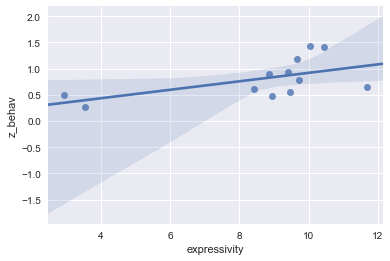

In [28]:
  #Plot

plt.figure()
scat1 = sns.regplot(x='expressivity', y ='z_behav', data=express)

# plt.title(f'Video {video}  |  Corr: {corr_values[0]: .3f}  |  P: {corr_values[1]: .3f}')
# plt.xlabel('Behavioral Coefficients')
# plt.ylabel('Scan Coefficients')




In [45]:
express = express.dropna(axis=0)
scipy.stats.pearsonr(express['expressivity'], express['z_behav'])


(0.57172813331892924, 0.052118749231522765)